<a href="https://colab.research.google.com/github/batmanvane/complex-systems-modeling/blob/main/notebooks/08_chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complex Systems Modeling - Session 8

# Chaos and Strange Attractors

**Course:** Complex Systems Modeling (Bachelor Semester 5)  
**Topic:** Transition to Chaos in Discrete and Continuous Systems

--- 

## Introduction

So far, we have studied systems that settle into stable states (equilibria) or oscillations. Today we explore **Chaos**. Chaos is a phenomenon where a deterministic nonlinear system behaves in a way that looks random and unpredictable.

Key characteristics of Chaos include:
1.  **Sensitivity to Initial Conditions:** The famous "Butterfly Effect".
2.  **Aperiodicity:** The system never repeats the exact same state.
3.  **Deterministic Nature:** It is generated by simple, noise-free equations.

We will explore two canonical examples: the **Logistic Map** (discrete time) and the **Lorenz System** (continuous time).


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, IntSlider, VBox, HBox, Label
from IPython.display import display
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Setup plotting style
plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries imported successfully.")


Libraries imported successfully.


## Part 1: Discrete Chaos - The Logistic Map

### System Description & Application
The Logistic Map is a mathematical model used in **population dynamics**. It describes a species reproducing in discrete generations (e.g., insects) with limited resources.

The equation is:

$$ x_{t} = r \cdot x_{t-1} (1 - x_{t-1}) $$

* $x_t$: The population ratio at time $t$ (bounded between 0 and 1).
* $r$: The growth rate parameter.

This model was popularized by Robert May in 1976 to show how very simple nonlinear models can produce astonishingly complex behavior.

### Interactive Exploration
Use the sliders below to observe the **Period-Doubling Cascade**.
* At low $r$, the population settles to a single stable value.
* As $r$ increases past 3.0, it oscillates between 2 values, then 4, then 8...
* At $r \approx 3.57$, it enters **Chaos**.


In [3]:
def logistic_map(x, r):
    return r * x * (1 - x)

def plot_logistic_interactive(r, x0, steps):
    # Initialize arrays
    t = np.arange(steps)
    x = np.zeros(steps)
    x[0] = x0

    # Iterate map
    for i in range(1, steps):
        x[i] = logistic_map(x[i-1], r)

    # Create Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # --- 1. Time Series Plot ---
    ax1.plot(t, x, 'b.-', linewidth=1)
    ax1.set_ylim(0, 1)
    ax1.set_xlabel('Time step (t)')
    ax1.set_ylabel('Population (x)')
    ax1.set_title(f'Time Series ($r={r}$)')
    
    # --- 2. Cobweb Plot ---
    # Plot the parabola y = r*x*(1-x)
    xi = np.linspace(0, 1, 100)
    yi = logistic_map(xi, r)
    ax2.plot(xi, yi, 'k-', linewidth=2, label='Map F(x)')
    ax2.plot([0, 1], [0, 1], 'g--', linewidth=1, label='y=x') # Diagonal

    # Plot the cobweb trajectory
    cx, cy = [x0], [0]
    for i in range(steps-1):
        # Move vertically to the curve
        cx.append(x[i])
        cy.append(x[i+1])
        # Move horizontally to the diagonal
        cx.append(x[i+1])
        cy.append(x[i+1])

    ax2.plot(cx, cy, 'r-', alpha=0.6, linewidth=1)
    ax2.plot(x0, 0, 'ro', label='Start')

    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    ax2.set_xlabel('$x_t$')
    ax2.set_ylabel('$x_{t+1}$')
    ax2.set_title('Cobweb Plot')
    ax2.legend(loc='upper left')

    plt.show()

print("="*70)
print("LOGISTIC MAP EXPLORER")
print("="*70)
print("Try these r values to see the transition:")
print("  r = 2.50 : Stable Equilibrium")
print("  r = 3.20 : Period-2 Oscillation")
print("  r = 3.50 : Period-4 Oscillation")
print("  r = 3.90 : Chaos")

slider_r = FloatSlider(min=0.0, max=4.0, step=0.01, value=2.5, description='r (growth):', continuous_update=False)
slider_x0 = FloatSlider(min=0.0, max=1.0, step=0.01, value=0.1, description='x0 (start):', continuous_update=False)
slider_steps = IntSlider(min=20, max=200, step=10, value=50, description='steps:', continuous_update=False)

w1 = interactive(plot_logistic_interactive, r=slider_r, x0=slider_x0, steps=slider_steps)
display(w1)


LOGISTIC MAP EXPLORER
Try these r values to see the transition:
  r = 2.50 : Stable Equilibrium
  r = 3.20 : Period-2 Oscillation
  r = 3.50 : Period-4 Oscillation
  r = 3.90 : Chaos


interactive(children=(FloatSlider(value=2.5, continuous_update=False, description='r (growth):', max=4.0, step…

## Part 2: The Bifurcation Diagram

This diagram summarizes the system's long-term behavior. It plots the asymptotic states (y-axis) for every value of $r$ (x-axis).

You can clearly see where the stable point splits into two, then four, and finally explodes into the chaotic regime ($r > 3.6$).


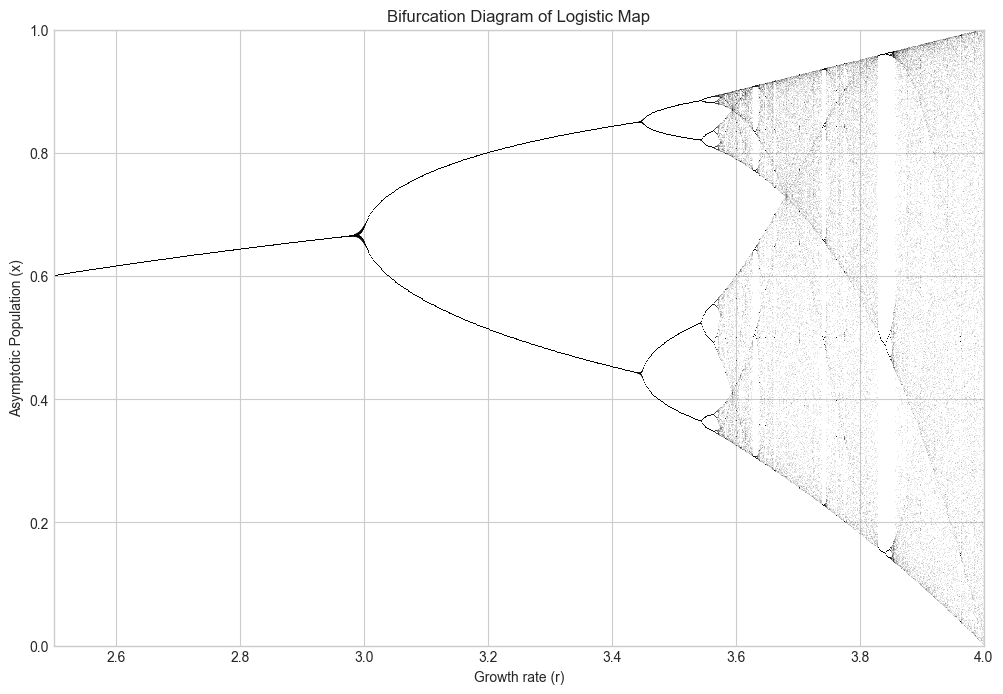

In [4]:
def draw_bifurcation_diagram(r_min, r_max, steps_to_discard, steps_to_keep):
    r_values = np.linspace(r_min, r_max, 1000)
    x = 0.5 * np.ones_like(r_values)

    plt.figure(figsize=(12, 8))

    # Discard transient steps to reach asymptotic behavior
    for _ in range(steps_to_discard):
        x = logistic_map(x, r_values)

    # Plot the stable states
    for _ in range(steps_to_keep):
        x = logistic_map(x, r_values)
        plt.plot(r_values, x, ',k', alpha=0.1)

    plt.title('Bifurcation Diagram of Logistic Map')
    plt.xlabel('Growth rate (r)')
    plt.ylabel('Asymptotic Population (x)')
    plt.xlim(r_min, r_max)
    plt.ylim(0, 1)
    plt.show()

# Visualize the famous period-doubling route to chaos
draw_bifurcation_diagram(2.5, 4.0, 200, 200)


## Part 3: Continuous Chaos - The Lorenz System

### Discovery and History
In 1963, **Edward Lorenz**, an American mathematician and meteorologist, was modeling atmospheric convection using a simplified system of differential equations.

He discovered **Chaos** accidentally. He wanted to re-examine a simulation, so he manually entered numbers from a printout. However, the printout rounded the numbers to 3 decimal places (e.g., 0.506), while the computer memory used 6 (e.g., 0.506127). This tiny difference, less than 0.1%, led to a completely different weather outcome after a short time.

This led to the term **"The Butterfly Effect"**: the idea that a butterfly flapping its wings in Brazil could set off a tornado in Texas. It implies that perfect long-term weather prediction is impossible.

### The Model
The Lorenz equations describe a 3D dynamical system:

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= x y - \beta z
\end{aligned}
$$

**Variables:**
* $x$: Rate of convection.
* $y$: Horizontal temperature variation.
* $z$: Vertical temperature variation.

**Parameters:**
* $\sigma$ (Sigma): Prandtl number (viscosity/thermal conductivity).
* $\rho$ (Rho): Rayleigh number (driving heat difference).
* $\beta$ (Beta): Geometric factor.

Typically, chaos is observed at $\sigma=10, \beta=8/3, \rho=28$.


In [6]:
def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def plot_lorenz_interactive(sigma, rho, beta, duration):
    # Standard Chaos parameters from text: sigma=10, rho=28 (or 30), beta=3 (or 8/3)
    dt = 0.01
    t = np.arange(0, duration, dt)
    initial_state = [1.0, 1.0, 1.0]

    # Solve ODE
    states = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))
    x, y, z = states[:, 0], states[:, 1], states[:, 2]

    # Setup Figure
    fig = plt.figure(figsize=(18, 8))

    # --- Plot 1: 3D Phase Space (The Strange Attractor) ---
    # This visualizes the trajectory in state space
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot(x, y, z, linewidth=0.6, color='purple')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title(f'Lorenz Attractor (Phase Space)\nRho={rho}')

    # --- Plot 2: Time Series of States (x, y, z) ---
    # This shows the unpredictable oscillations over time
    ax2 = fig.add_subplot(1, 2, 2)
    
    # We plot a subset of time to see the details clearly
    limit_view = 2000 # View first 2000 steps
    if len(t) < limit_view:
        limit_view = len(t)
    
    ax2.plot(t[:limit_view], x[:limit_view], label='x', alpha=0.8)
    ax2.plot(t[:limit_view], y[:limit_view], label='y', alpha=0.8)
    ax2.plot(t[:limit_view], z[:limit_view], label='z', alpha=0.8)
    
    ax2.set_xlabel('Time (t)')
    ax2.set_ylabel('State Value')
    ax2.set_title('Time Series of State Variables')
    ax2.legend()

    plt.show()

print("="*70)
print("LORENZ SYSTEM VISUALIZER")
print("="*70)

# Widgets for parameters
# Standard parameters for chaos: sigma=10, rho=28, beta=2.67
style = {'description_width': 'initial'}
s_sigma = FloatSlider(value=10.0, min=0, max=50, description='Sigma (Prandtl):', style=style)
s_rho = FloatSlider(value=28.0, min=0, max=50, description='Rho (Rayleigh):', style=style)
s_beta = FloatSlider(value=2.67, min=0, max=10, description='Beta:', style=style)
s_dur = IntSlider(value=50, min=10, max=100, description='Duration:', style=style)

w2 = interactive(plot_lorenz_interactive, sigma=s_sigma, rho=s_rho, beta=s_beta, duration=s_dur)
display(w2)


LORENZ SYSTEM VISUALIZER


interactive(children=(FloatSlider(value=10.0, description='Sigma (Prandtl):', max=50.0, style=SliderStyle(desc…

### Observation

In the plots above, notice the behavior of the time series (right plot):
* $x$ and $y$ oscillate, staying on positive or negative sides for a while, but then unpredictably switch sides.
* $z$ remains positive but oscillates with growing amplitude.

In the 3D plot (left), this switching creates the two "wings" of the butterfly-shaped attractor. The system orbits one wing, then spirals out and jumps to the other wing, never intersecting its own path (which would imply periodicity).
